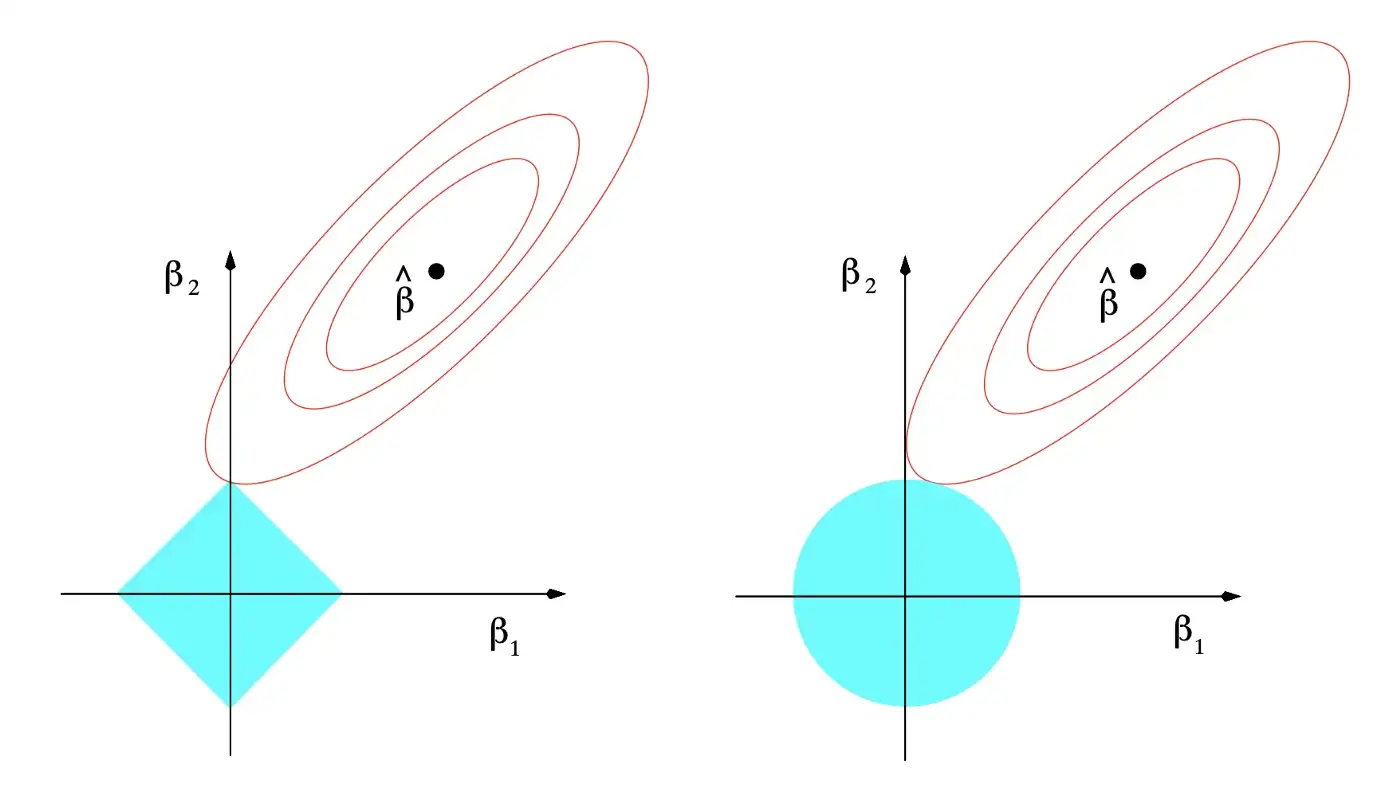

## 릿지 회귀(Ridge Regression)

- L2-norm 패널티를 더한 선형회귀 model
  - 기존 선형 모델에 규제항을 추가해 overfitting을 해결
- 가중치(회귀계수)의 절대값 규제(regularization)하여 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 한다.
- 릿지 회귀는 회귀계수를 0에 가깝게하지만 0으로 만들지 않음(이미지 참고)

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  - $\alpha$: 사용자가 지정하는 매개변수
  - $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐
  - $\alpha$가 없으면 일반적인 선형 회귀와 같다.

__참고__ 
- 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
  - 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생

### 보스턴 주택 가격에 대한 릿지 회귀

In [1]:
from sklearn.linear_model import Ridge
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [43]:
# from sklearn.datasets import load_boston
import pandas
url = "https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv"
boston_df = pandas.read_csv(url)
del boston_df["Unnamed: 0"]

x = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1:]

# x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [3]:
# x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [4]:
model = Ridge(alpha = 0.2 )
model.fit(x_train, y_train)

Ridge(alpha=0.2)

In [5]:
# print model score x_train)
model.score(x_train, y_train)

0.7430220256398608

In [6]:
model.score(x_test, y_test)

0.7181432995200032

In [7]:
import matplotlib.pyplot as plt
def plot_boston_price(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([5, 50], [5, 50], '--r') 
    plt.xlabel('True price ($1,000s)')
    plt.ylabel('Predicted price ($1,000s)')
    plt.tight_layout()

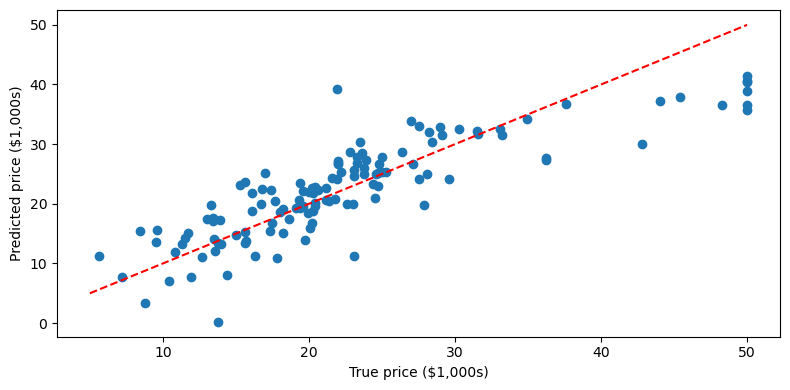

In [8]:
x_test_predict = model.predict(x_test)
plot_boston_price(y_test, x_test_predict)

### 캘리포니아 주택 가격에 대한 릿지 회귀
- alpha 값을 0.1, 0.2, 0.3, 0.4, 0.5 까지 작성하여 비교해 보세요 
- alpha 가 너무 작으면 overfitting, 너무 크면  underfitting 발생

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
california = fetch_california_housing()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [11]:
import numpy as np

In [38]:
models = [Ridge(alpha= round(i, 1)) for i in np.arange(1000, 10000, 100)] # 0.1 ~1 까지 0.1 스탭으로 

In [39]:
models[3]

Ridge(alpha=1300)

In [40]:
trained_models = []
for model in models:
    model.fit(x_train, y_train) # 학습
    trained_models.append(model) # 학습된 model 을 list에 저장 
    print(f"alpha : {model.alpha}, model score train: {model.score(x_train, y_train)}, model score test {model.score(x_test, y_test)}")

alpha : 1000, model score train: 0.5988331092336792, model score test 0.6010222072378457
alpha : 1100, model score train: 0.5980946901447772, model score test 0.6003743946061396
alpha : 1200, model score train: 0.5973605259474097, model score test 0.5997318606383247
alpha : 1300, model score train: 0.5966305564138955, model score test 0.5990937545391217
alpha : 1400, model score train: 0.595904769671522, model score test 0.5984594995118147
alpha : 1500, model score train: 0.5951831985666353, model score test 0.5978287237087736
alpha : 1600, model score train: 0.5944659110305295, model score test 0.5972012058244327
alpha : 1700, model score train: 0.5937529993389279, model score test 0.5965768331219574
alpha : 1800, model score train: 0.5930445703247499, model score test 0.5959555694910221
alpha : 1900, model score train: 0.5923407372614105, model score test 0.5953374313817217
alpha : 2000, model score train: 0.5916416135182655, model score test 0.5947224698273457
alpha : 2100, model sc

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(f"linear regression , model score train: {model.score(x_train, y_train)}, model score test {model.score(x_test, y_test)}")

linear regression , model score train: 0.6056308476283043, model score test 0.607978084703664


In [53]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize = (8, 4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5], [0, 5], '--r') 
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('Predicted pirce ($100,000s)')
  plt.tight_layout()

## 라쏘 회귀(Lasso Regression)
- L1-norm 패널티를 더한 선형회귀 model
- 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
- 불필요한 회귀계수를 급격하게 감소시켜 0으로 만들고 제거(이미지 참고)
    - model 을 단순하게 만들어 overfitting 을 방지 한다. 

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

- 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [41]:
from sklearn.linear_model import Lasso

In [44]:
# from sklearn.datasets import load_boston

x = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1:]

# x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [45]:
model = Lasso(alpha= 0.5)
model.fit(x_train, y_train)

Lasso(alpha=0.5)

In [47]:
model.score(x_train, y_train)

0.7066078366600359

In [48]:
model.score(x_test, y_test)

0.7151725298629373

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [49]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

In [52]:
# alpha = 10, 1, 0.1, 0.01, 0.001

models = [Lasso(alpha = round(10* 0.1 **i, 3)) for i in np.arange(0, 5)]
trained_models = []
for model in models:
    model.fit(x_train, y_train) # 학습
    trained_models.append(model) # 학습된 model 을 list에 저장 
    print(f"alpha : {model.alpha}, model score train: {model.score(x_train, y_train)}, model score test {model.score(x_test, y_test)}")

alpha : 10.0, model score train: 0.00037884304039348393, model score test 0.000801786056428333
alpha : 1.0, model score train: 0.2790103312877513, model score test 0.2930920090577859
alpha : 0.1, model score train: 0.5436443724370932, model score test 0.5563238786716793
alpha : 0.01, model score train: 0.6036745154702026, model score test 0.6018464861378527
alpha : 0.001, model score train: 0.6080072448237211, model score test 0.5933507174885424


## 신축망 (Elastic-Net)

- 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델. 
- 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 준다.

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}


- $\alpha$: 규제의 강도를 조절하는 매개변수
- $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수
    - 0 이면 L2, 1 이면 L1 과 동일하다. 
    - 0~1 사이의 값을 적당하게 넣어 가중치 조절 매개변수의 강도를 조절한다. 

### 보스턴 주택 가격에 대한 신축망

In [53]:
from sklearn.linear_model import ElasticNet

In [54]:
# from sklearn.datasets import load_boston
import pandas
x = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1:]

# x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [57]:
# alpha = 10, 1, 0.1, 0.01, 0.001

models = [ElasticNet(alpha = round(10* 0.1 **i, 5), l1_ratio=0.5 ) for i in np.arange(0, 7)]
trained_models = []
for model in models:
    model.fit(x_train, y_train) # 학습
    trained_models.append(model) # 학습된 model 을 list에 저장 
    print(f"alpha : {model.alpha}, model score train: {model.score(x_train, y_train)}, model score test {model.score(x_test, y_test)}")

alpha : 10.0, model score train: 0.5793962999111989, model score test 0.4505856413201653
alpha : 1.0, model score train: 0.6907920048254199, model score test 0.6098042158190341
alpha : 0.1, model score train: 0.7270697123481855, model score test 0.6923027549714885
alpha : 0.01, model score train: 0.7397453959727256, model score test 0.7055212229629175
alpha : 0.001, model score train: 0.7461476080412268, model score test 0.7036493559203889
alpha : 0.0001, model score train: 0.7464676898973606, model score test 0.7020312072431507
alpha : 1e-05, model score train: 0.7464718366280707, model score test 0.7018174334887533


### 캘리포니아 주택 가격에 대한 신축망

In [58]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [59]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

In [61]:
# alpha = 10, 1, 0.1, 0.01, 0.001

models = [ElasticNet(alpha = round(10* 0.1 **i, 5), l1_ratio=0.5 ) for i in np.arange(0, 7)]
trained_models = []
for model in models:
    model.fit(x_train, y_train) # 학습
    trained_models.append(model) # 학습된 model 을 list에 저장 
    print(f"alpha : {model.alpha}, model score train: {model.score(x_train, y_train)}, model score test {model.score(x_test, y_test)}")

alpha : 10.0, model score train: 0.0006258651642643276, model score test 0.00018863732597707017
alpha : 1.0, model score train: 0.42199925124563087, model score test 0.41672621200156934
alpha : 0.1, model score train: 0.5731456605062366, model score test 0.5807689369178498
alpha : 0.01, model score train: 0.6008346068118591, model score test 0.6151690130441259
alpha : 0.001, model score train: 0.602490470136536, model score test 0.6193945883982082
alpha : 0.0001, model score train: 0.6025113978933678, model score test 0.6197156471656786
alpha : 1e-05, model score train: 0.6025116126036087, model score test 0.6197463919286688


In [ ]:
# 참고자료
# https://ratsgo.github.io/machine%20learning/2017/05/22/RLR/
# https://towardsdatascience.com/from-linear-regression-to-ridge-regression-the-lasso-and-the-elastic-net-4eaecaf5f7e6
# https://pdsi.pabii.com/l1-l2-regularization-intuitive-understanding/
# https://arxiv.org/pdf/1509.09169.pdf